<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/Prueba_final_modelos_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
ruta_archivo_train = '/content/drive/My Drive/NHANES/dataset_train_imputado.csv'
ruta_archivo_test = '/content/drive/My Drive/NHANES/dataset_test_imputado.csv'


df_train = pd.read_csv(ruta_archivo_train)
df_test = pd.read_csv(ruta_archivo_test)


## **Explicación de las pruebas a realizar**

En principio se imputaron todas las variables que podrían servir para este proyecto. Esto se hizo con el fin de probar todos los modelos posibles  que permiten resolver el problema. Como el dataset ya tenía faltantes, sobre todo en lo que tiene que ver con los resultados de laboratorio, se podría haber aprovechado esto para hacer las pruebas por etapas, pero limita la cantidad de modelos a utilizar, ya que algunos no soportan faltantes. Según los resultados que se obtengan y los modelos que mejor funcionan, se podría realizar esta prueba o no.

Como primera etapa, se entrenarán los modelos con el dataset completo. Según los resultados obtenidos, se procederá a realizar las pruebas por etapas, es decir, entrenamiento con parte del dataset (datos básicos del paciente) y después con el dataset completo con el modelo seleccionado.

In [3]:
df_train.head()

,edad,genero,colesterol_total,hdl,ldl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,...,consumo_excesivo_alcohol_ultimo_año_8.0,consumo_excesivo_alcohol_ultimo_año_9.0,consumo_excesivo_alcohol_ultimo_año_10.0,consumo_excesivo_alcohol_ultimo_año_22.0,consumo_excesivo_alcohol_ultimo_año_23.0,consumo_excesivo_alcohol_ultimo_año_99.0,anhedonia_1.0,anhedonia_2.0,anhedonia_3.0,anhedonia_9.0
0,0.027815,1,0.635525,-0.409169,110.804858,1.430187,-0.633385,-0.926269,1,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.598832,1,-0.236009,0.044620,100.609504,-0.035063,-0.681892,-1.527568,0,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.869431,1,-0.154793,-0.056492,105.080360,-0.040414,-0.646549,-0.547527,1,2.387436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.084401,1,0.421306,0.838667,118.001130,-0.366252,-0.041933,-0.024172,0,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.589371,0,0.226934,-0.409169,112.161330,0.702848,0.117120,0.260671,0,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
df_test.head()

,edad,genero,colesterol_total,hdl,ldl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,...,consumo_excesivo_alcohol_ultimo_año_8.0,consumo_excesivo_alcohol_ultimo_año_9.0,consumo_excesivo_alcohol_ultimo_año_10.0,consumo_excesivo_alcohol_ultimo_año_22.0,consumo_excesivo_alcohol_ultimo_año_23.0,consumo_excesivo_alcohol_ultimo_año_99.0,anhedonia_1.0,anhedonia_2.0,anhedonia_3.0,anhedonia_9.0
0,0.196138,0,0.770258,-0.658294,150.000000,-0.004461,-0.450077,0.112943,1,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.598832,0,-0.431028,-0.251770,68.593972,1.372133,-1.033075,-1.237209,1,2.387436,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.869431,0,0.658245,-0.251770,135.000000,0.354777,-1.308794,-0.796544,1,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.308353,0,-0.724117,-1.744878,78.000000,1.241630,0.377605,-0.945102,0,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.084401,1,0.354166,-0.251770,112.198324,0.850878,-0.663495,-0.360865,0,-0.450093,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 83 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   edad                                      4454 non-null   float64
 1   genero                                    4454 non-null   int64  
 2   colesterol_total                          4454 non-null   float64
 3   hdl                                       4454 non-null   float64
 4   ldl                                       4454 non-null   float64
 5   trigliceridos                             4454 non-null   float64
 6   proteina_c                                4454 non-null   float64
 7   bmi                                       4454 non-null   float64
 8   fumo_100_cigarrillos                      4454 non-null   int64  
 9   fumador_actual                            4454 non-null   float64
 10  act_vigorosa                        

In [6]:
# NIVEL 1: Datos de Primera Consulta (Anamnesis y Examen Físico Básico)
# Lo que el médico obtiene preguntando y pesando/midiendo al paciente.
# nivel_1_basico = [
#     'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
#     'fumador_actual', 'fumo_100_cigarrillos', 'consumo_alcohol_ultimo_año',
#     'consumo_excesivo_alcohol_ultimo_año', 'act_caminar_bici', 'act_moderada',
#     'act_vigorosa', 'realiza_actividad_intensidad_moderada',
#     'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
#     'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
# ]
# nivel_1_basico = [
#     'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
#     'fumador_actual', 'consumo_alcohol_ultimo_año',
#     'act_vigorosa', 'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
#     'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
# ]

# # NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# # Datos que requieren una historia clínica o un tensiómetro.
# nivel_2_antecedentes = [
#     'fam_cardio', 'fam_asma', 'fam_diabetes', 'hipertension',
#     'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
#     'colesterol_alto', 'riñones_debiles_fallando',
#     'presion_sistolica_final', 'presion_diastolica_final'
# ]

# # NIVEL 3: Laboratorio Avanzado
# # Resultados bioquímicos específicos.
# nivel_3_laboratorio = [
#     'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
#     'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina'
# ]

# # Unificamos todas para el entrenamiento inicial
# features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

La glicohemoglobina no es de rutina. Normalmente se piden glucosa (es barata y básica), pero la glicohemoglobina solo se le pide a quienes ya se sospecha que son diabéticos o para control de tratamiento, por lo que se evitará usar este valor.

Si bien, en los test anova, información mutua dan una idea de que variables se podrían usar, también se tendrá en cuenta el hecho de que algunas pueden representar casi lo mismo, por lo que se elegirá una u otra.

In [7]:
df_train_temp = df_train.copy()
df_test_temp = df_test.copy()

# columnas_eliminadas = ['raza_origen_7','act_caminar_bici_2.0','act_caminar_bici_9.0','act_moderada_2.0','act_moderada_9.0',
#                        'raza_origen_1','raza_origen_2', 'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto_2.0',
#                        'colesterol_alto_9.0', 'ancho_distribucion_globulos','fam_asma_2.0', 'fam_asma_9.0',
#                        'glicohemoglobina','fumo_100_cigarrillos','realiza_actividad_intensidad_moderada',
#                        'consumo_excesivo_alcohol_ultimo_año']


# Se quitan las variables que no van a ser consideradas

columnas_eliminadas = ['raza_origen_7','act_caminar_bici_2.0','act_caminar_bici_9.0','act_moderada_2.0','act_moderada_9.0',
                       'raza_origen_1','raza_origen_2', 'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto_2.0',
                       'colesterol_alto_9.0', 'fumador_actual','ancho_distribucion_globulos',
                       'glicohemoglobina','realiza_actividad_intensidad_moderada','consumo_excesivo_alcohol_ultimo_año_1.0','consumo_excesivo_alcohol_ultimo_año_2.0',
                       'consumo_excesivo_alcohol_ultimo_año_9.0', 'consumo_excesivo_alcohol_ultimo_año_3.0', 'consumo_excesivo_alcohol_ultimo_año_4.0', 'consumo_excesivo_alcohol_ultimo_año_5.0',
                       'consumo_excesivo_alcohol_ultimo_año_6.0', 'consumo_excesivo_alcohol_ultimo_año_7.0', 'consumo_excesivo_alcohol_ultimo_año_8.0', 'consumo_excesivo_alcohol_ultimo_año_10.0',
                       'consumo_excesivo_alcohol_ultimo_año_22.0', 'consumo_excesivo_alcohol_ultimo_año_23.0', 'consumo_excesivo_alcohol_ultimo_año_99.0',
                       'act_vigorosa','prediabetes_glucosa_alterada_2.0','prediabetes_glucosa_alterada_3.0', 'prediabetes_glucosa_alterada_9.0','enzima_tgp']



# nivel_1_basico = [
#     'edad', 'genero', 'fumo_100_cigarrillos',
#     'consumo_alcohol_ultimo_año', 'consumo_excesivo_alcohol_ultimo_año',
#     'actividad_deportiva_moderada_x_semana',
#     'horas_suenio', 'anhedonia', # Características básicas
# ]

# # ETAPA 2: Lo que el médico mide (Examen Físico y Antecedentes)
# nivel_2_antecedentes = [
#     'bmi', 'presion_sistolica_final', 'presion_diastolica_final',
#     'fam_cardio_2.0', 'fam_cardio_9.0', 'fam_diabetes_2.0', 'fam_diabetes_9.0',
#     'fam_asma_2.0', 'fam_asma_9.0',
#     'riñones_debiles_fallando_2.0', 'riñones_debiles_fallando_9.0',
#     'hipertension_2', 'hipertension_9', # Todas las categorías de hipertensión
# ]

# # ETAPA 3: Análisis de Laboratorio
# nivel_3_laboratorio = [
#     'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c', 'hemoglobina', 'creatinina' # Todas las características de laboratorio
# ]

df_train_temp.drop(columns=columnas_eliminadas, inplace=True)
df_test_temp.drop(columns=columnas_eliminadas, inplace=True)

df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   ldl                                    4454 non-null   float64
 5   trigliceridos                          4454 non-null   float64
 6   proteina_c                             4454 non-null   float64
 7   bmi                                    4454 non-null   float64
 8   fumo_100_cigarrillos                   4454 non-null   int64  
 9   horas_suenio                           4454 non-null   float64
 10  hemoglobina                            4454 non-null   float64
 11  crea

In [8]:
TARGET = "alto_riesgo"

X_train = df_train_temp.drop(columns=[TARGET])
y_train = df_train_temp[TARGET]

X_test = df_test_temp.drop(columns=[TARGET])
y_test = df_test_temp[TARGET]


In [9]:
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluar_overfitting(
    modelo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.25,
    nombre="Modelo"
):

    # Probabilidades
    prob_train = modelo.predict_proba(X_train)[:, 1]
    prob_test = modelo.predict_proba(X_test)[:, 1]

    # Predicciones binarias
    pred_train = (prob_train >= threshold).astype(int)
    pred_test = (prob_test >= threshold).astype(int)

    # Métricas train
    auc_train = roc_auc_score(y_train, prob_train)
    recall_train = recall_score(y_train, pred_train)
    precision_train = precision_score(y_train, pred_train)
    f1_train = f1_score(y_train, pred_train)

    # Métricas test
    auc_test = roc_auc_score(y_test, prob_test)
    recall_test = recall_score(y_test, pred_test)
    precision_test = precision_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"\n===== {nombre} ====")
    print("---- TRAIN ----")
    print(f"AUC: {auc_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"F1: {f1_train:.4f}")

    print("\n---- TEST ----")
    print(f"AUC: {auc_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"F1: {f1_test:.4f}")

    auc_gap = auc_train - auc_test
    recall_gap = recall_train - recall_test
    print(f"\n---- GAP (Train-Test) ----")
    print(f"AUC gap: {auc_gap:.4f}")
    print(f"Recall gap: {recall_gap:.4f}")

    # Matriz de confusión para el conjunto de prueba
    cm = confusion_matrix(y_test, pred_test)
    labels = ["Bajo riesgo", "Alto riesgo"]

    # Normalizar la matriz de confusión para mostrar porcentajes
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm_normalized,
        annot=True,
        fmt=".2%", # Formato de porcentaje con 2 decimales
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión Normalizada - {nombre} (TEST)")
    plt.show()

    return {
        "auc_train": auc_train,
        "recall_train": recall_train,
        "precision_train": precision_train,
        "f1_train": f1_train,
        "auc_test": auc_test,
        "recall_test": recall_test,
        "precision_test": precision_test,
        "f1_test": f1_test,
        "auc_gap": auc_gap,
        "recall_gap": recall_gap
    }

# **PRUEBAS SIN BALANCEO**

Se hace prueba inicial sin balanceo. Se espera que, dado el gran desbalance del target, los reusltados no sean buenos.

Se prueba: Ramdom forest, xgboost(sin balance), Regresión logística, Árbol de decisión, SVM


In [10]:
results = []

### ***RAMDOM FOREST***


===== Random Forest (No Balanceo) ====
---- TRAIN ----
AUC: 0.9004
Recall: 0.1410
Precision: 0.8298
F1: 0.2411

---- TEST ----
AUC: 0.8468
Recall: 0.0797
Precision: 0.5789
F1: 0.1401

---- GAP (Train-Test) ----
AUC gap: 0.0536
Recall gap: 0.0613


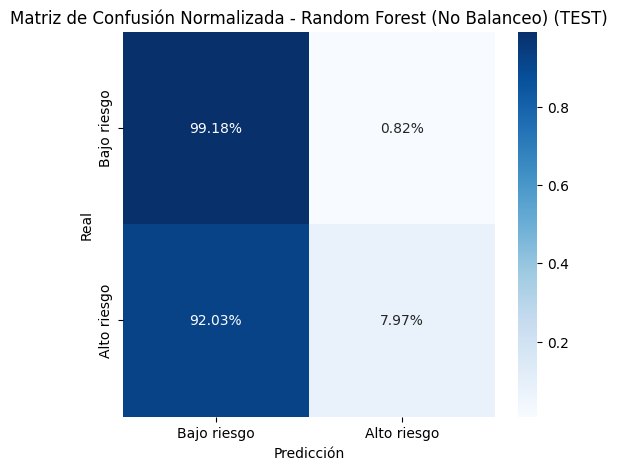

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
modelo_rf_nobalanceo = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_rf_nobalanceo.fit(X_train, y_train)

# Se campturan métricas
rf_nobalanceo_metrics = evaluar_overfitting(
    modelo_rf_nobalanceo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Random Forest (No Balanceo)"
)

# Se agregan las métricas a la lista de resultados
results.append({"Modelo": "Random Forest (Sin Balanceo)", **rf_nobalanceo_metrics})

### ***XGBOOST***


===== XGBoost (Sin Balanceo) ====
---- TRAIN ----
AUC: 0.8852
Recall: 0.3309
Precision: 0.5884
F1: 0.4236

---- TEST ----
AUC: 0.8534
Recall: 0.2971
Precision: 0.5062
F1: 0.3744

---- GAP (Train-Test) ----
AUC gap: 0.0318
Recall gap: 0.0338


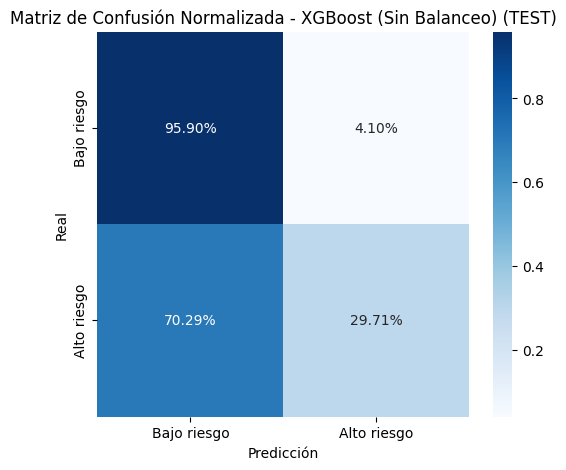

In [12]:
from xgboost import XGBClassifier

# Modelo XGBoost
modelo_xgb_nobalanceo = XGBClassifier(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=2,
    eval_metric="auc",
    random_state=42
)

modelo_xgb_nobalanceo.fit(X_train, y_train)

xgb_nobalanceo_metrics = evaluar_overfitting(
    modelo_xgb_nobalanceo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="XGBoost (Sin Balanceo)"
)

results.append({"Modelo": "XGBoost (Sin Balanceo)", **xgb_nobalanceo_metrics})

### ***LOGISTIC REGRESSION***


===== Logistic Regression (No Balanceo) ====
---- TRAIN ----
AUC: 0.8721
Recall: 0.3816
Precision: 0.5396
F1: 0.4470

---- TEST ----
AUC: 0.8517
Recall: 0.3043
Precision: 0.4773
F1: 0.3717

---- GAP (Train-Test) ----
AUC gap: 0.0203
Recall gap: 0.0772


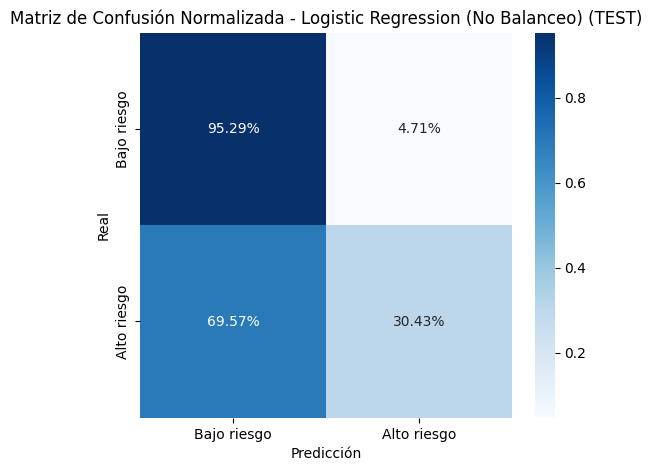

In [13]:
from sklearn.linear_model import LogisticRegression

modelo_lr_nobalanceo = LogisticRegression(
    max_iter=2000,
    random_state=42
)

modelo_lr_nobalanceo.fit(X_train, y_train)

lr_nobalanceo_metrics = evaluar_overfitting(
    modelo_lr_nobalanceo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression (No Balanceo)"
)

results.append({"Modelo": "Logistic Regression (No Balanceo)", **lr_nobalanceo_metrics})

### ***DECISION TREE***


===== Decision Tree (No Balanceo) ====
---- TRAIN ----
AUC: 0.8684
Recall: 0.3562
Precision: 0.5760
F1: 0.4402

---- TEST ----
AUC: 0.7914
Recall: 0.2319
Precision: 0.3855
F1: 0.2896

---- GAP (Train-Test) ----
AUC gap: 0.0771
Recall gap: 0.1244


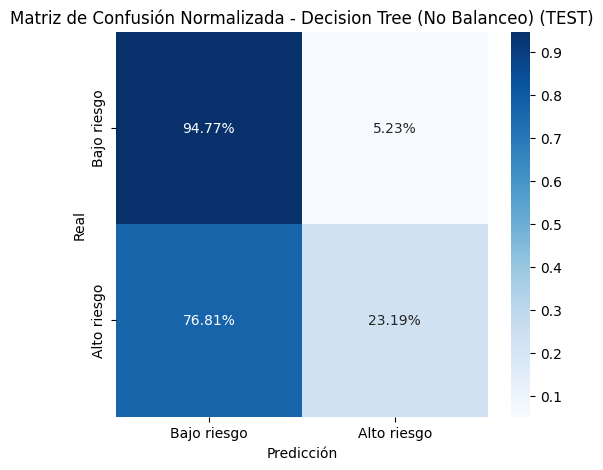

In [14]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt_nobalanceo = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

modelo_dt_nobalanceo.fit(X_train, y_train)

dt_nobalanceo_metrics = evaluar_overfitting(
    modelo_dt_nobalanceo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Decision Tree (No Balanceo)"
)

results.append({"Modelo": "Decision Tree (No Balanceo)", **dt_nobalanceo_metrics})

### ***SVM***


===== SVM Linear Kernel (Sin Balanceo) ====
---- TRAIN ----
AUC: 0.8677
Recall: 0.2242
Precision: 0.5439
F1: 0.3175

---- TEST ----
AUC: 0.8511
Recall: 0.1884
Precision: 0.4483
F1: 0.2653

---- GAP (Train-Test) ----
AUC gap: 0.0166
Recall gap: 0.0358


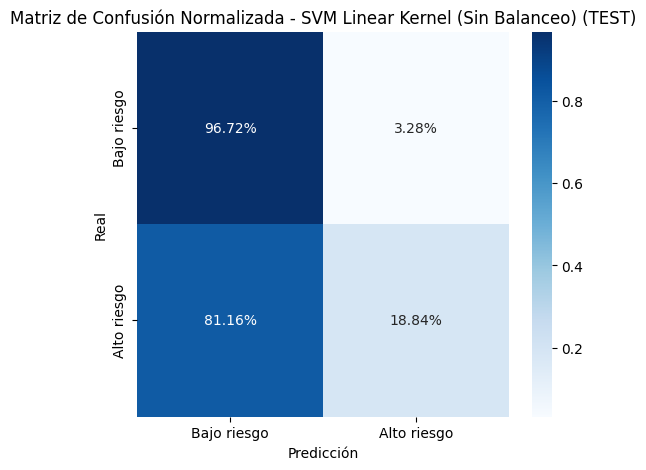

In [15]:
from sklearn.svm import SVC

modelo_svm_nobalanceo = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
)

modelo_svm_nobalanceo.fit(X_train, y_train)

svm_nobalanceo_metrics = evaluar_overfitting(
    modelo_svm_nobalanceo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="SVM Linear Kernel (Sin Balanceo)"
)

results.append({"Modelo": "SVM Linear Kernel (No Balanceo)", **svm_nobalanceo_metrics})

In [16]:
import pandas as pd

df_nobalanceo_results = pd.DataFrame(results)

df_nobalanceo_results

,Modelo,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Random Forest (Sin Balanceo),0.900359,0.141049,0.829787,0.241113,0.846787,0.079710,0.578947,0.140127,0.053572,0.061339
1,XGBoost (Sin Balanceo),0.885210,0.330922,0.588424,0.423611,0.853446,0.297101,0.506173,0.374429,0.031763,0.033821
2,Logistic Regression (No Balanceo),0.872059,0.381555,0.539642,0.447034,0.851746,0.304348,0.477273,0.371681,0.020313,0.077207
3,Decision Tree (No Balanceo),0.868435,0.356239,0.576023,0.440223,0.791381,0.231884,0.385542,0.289593,0.077054,0.124355
4,SVM Linear Kernel (No Balanceo),0.867724,0.224231,0.543860,0.317542,0.851137,0.188406,0.448276,0.265306,0.016587,0.035826


# **PRUEBAS CON BALANCEO**

Se prueban los mismos modelos pero con balanceo. Además se agrega a modo de prueba el Balanced Ramdom Forest, un modelo especialmente pensado para lidear con desbalances en los datasets.

In [17]:
# Inicializamos la lista para almacenar los resultados de los modelos
results = []

## **RAMDOM FOREST**

### ***BALANCEO PROPIO***


===== Random Forest (Class Weight Balanced) ====
---- TRAIN ----
AUC: 0.9012
Recall: 0.9638
Precision: 0.2814
F1: 0.4356

---- TEST ----
AUC: 0.8559
Recall: 0.8913
Precision: 0.2686
F1: 0.4128

---- GAP (Train-Test) ----
AUC gap: 0.0453
Recall gap: 0.0725


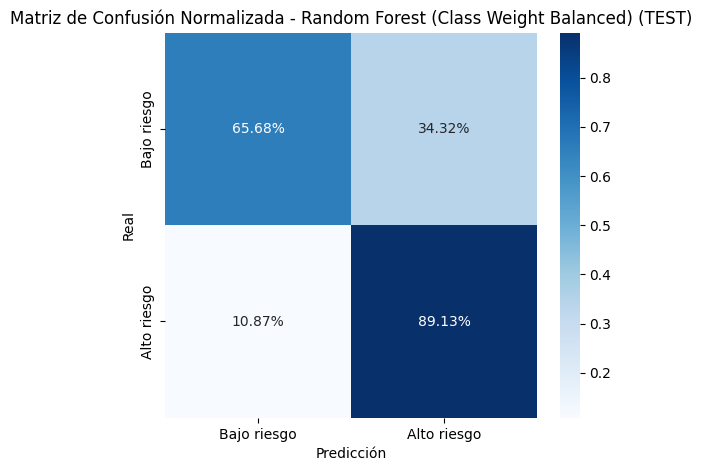

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest con class_weight='balanced'
modelo_rf_balanced_weight = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

modelo_rf_balanced_weight.fit(X_train, y_train)

rf_balanced_weight_metrics = evaluar_overfitting(
    modelo_rf_balanced_weight,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Random Forest (Class Weight Balanced)"
)

results.append({"Modelo": "Random Forest (Class Weight Balanced)", **rf_balanced_weight_metrics})

### ***SMOTE***

Antes SMOTE:
alto_riesgo
0    3901
1     553
Name: count, dtype: int64

Después SMOTE:
alto_riesgo
0    3901
1    1950
Name: count, dtype: int64

===== Random Forest + SMOTE ====
---- TRAIN ----
AUC: 0.9497
Recall: 0.8569
Precision: 0.7942
F1: 0.8244

---- TEST ----
AUC: 0.8463
Recall: 0.6087
Precision: 0.4286
F1: 0.5030

---- GAP (Train-Test) ----
AUC gap: 0.1034
Recall gap: 0.2482


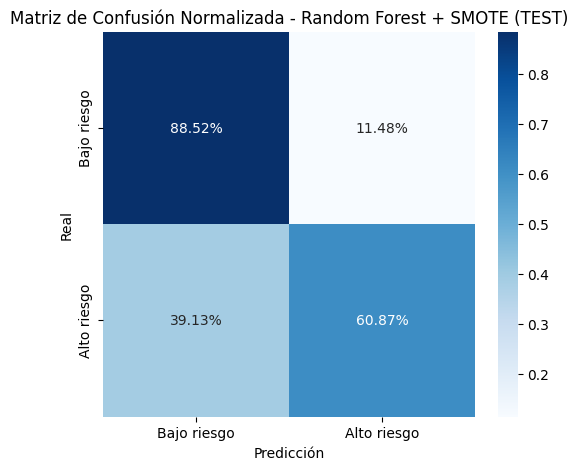

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(
    sampling_strategy=0.5,
    random_state=42,
    k_neighbors=3
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Antes SMOTE:")
print(y_train.value_counts())

print("\nDespués SMOTE:")
print(y_train_sm.value_counts())


# Modelo
modelo_smote = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_smote.fit(X_train_sm, y_train_sm)

rf_smote_metrics = evaluar_overfitting(
    modelo_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="Random Forest + SMOTE"
)

results.append({"Modelo": "Random Forest + SMOTE", **rf_smote_metrics})

### ***UNDERSAMPLING***

In [20]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(
    sampling_strategy=0.5,
    random_state=42
)

X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Antes Undersampling:")
print(y_train.value_counts())

print("\nDespués Undersampling:")
print(y_train_under.value_counts())

Antes Undersampling:
alto_riesgo
0    3901
1     553
Name: count, dtype: int64

Después Undersampling:
alto_riesgo
0    1106
1     553
Name: count, dtype: int64



===== Random Forest (Undersampling) ====
---- TRAIN ----
AUC: 0.9117
Recall: 0.7794
Precision: 0.7342
F1: 0.7561

---- TEST ----
AUC: 0.8434
Recall: 0.7101
Precision: 0.3698
F1: 0.4864

---- GAP (Train-Test) ----
AUC gap: 0.0683
Recall gap: 0.0692


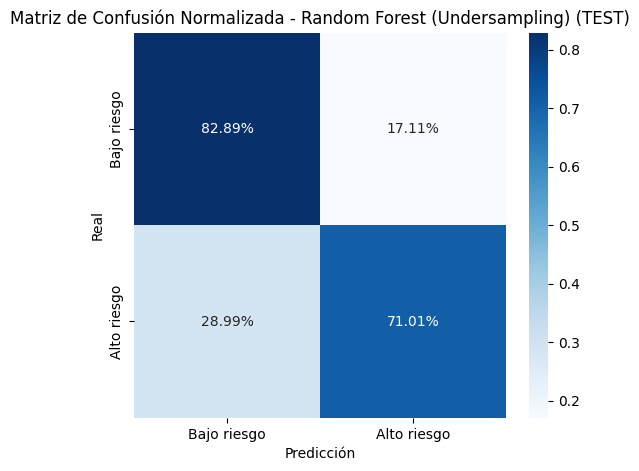

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest con Undersampling
modelo_rf_under = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_rf_under.fit(X_train_under, y_train_under)

rf_under_metrics = evaluar_overfitting(
    modelo_rf_under,
    X_train_under, y_train_under,
    X_test, y_test,
    threshold=0.4,
    nombre="Random Forest (Undersampling)"
)

results.append({"Modelo": "Random Forest (Undersampling)", **rf_under_metrics})

## **XGBOOST**

### ***SMOTE***


===== XGBoost ====
---- TRAIN ----
AUC: 0.9512
Recall: 0.9338
Precision: 0.6818
F1: 0.7881

---- TEST ----
AUC: 0.8467
Recall: 0.7609
Precision: 0.3355
F1: 0.4656

---- GAP (Train-Test) ----
AUC gap: 0.1045
Recall gap: 0.1730


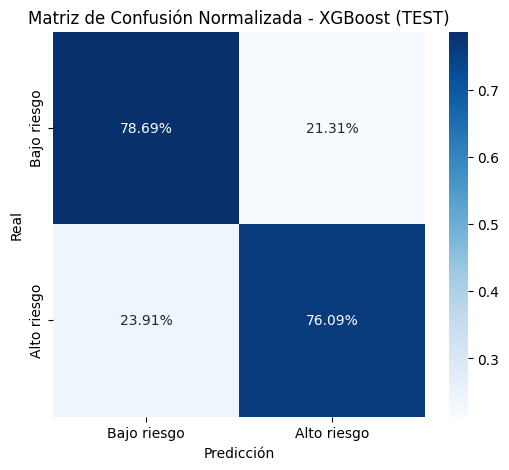

In [22]:
from xgboost import XGBClassifier

# ratio clases para penalización
ratio = (y_train == 0).sum() / (y_train == 1).sum() #9.55

modelo_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=2,
    scale_pos_weight=2, # Mejor valor encontrado
    eval_metric="auc",
    random_state=42
)

modelo_xgb.fit(X_train_sm, y_train_sm)

xgb_metrics = evaluar_overfitting(
    modelo_xgb,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="XGBoost"
)

results.append({"Modelo": "XGBoost", **xgb_metrics})

## **BALANCED RADOM FOREST**


===== Balanced RF (Class Weight Balanced) ====
---- TRAIN ----
AUC: 0.9991
Recall: 1.0000
Precision: 0.4102
F1: 0.5818

---- TEST ----
AUC: 0.8490
Recall: 0.8478
Precision: 0.3095
F1: 0.4535

---- GAP (Train-Test) ----
AUC gap: 0.1501
Recall gap: 0.1522


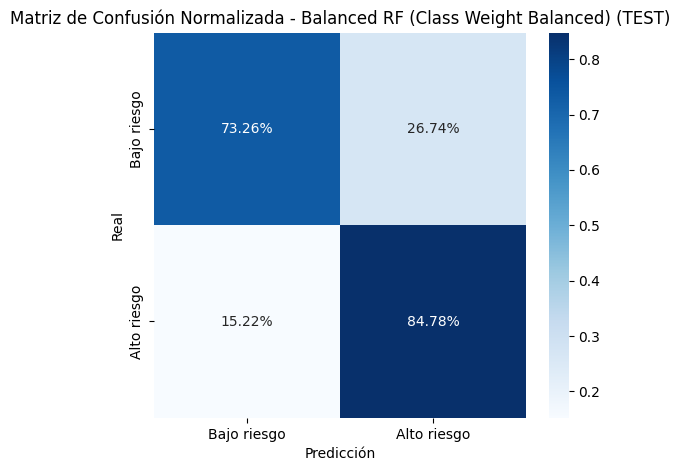

In [23]:
from imblearn.ensemble import BalancedRandomForestClassifier

modelo_brf = BalancedRandomForestClassifier(
    n_estimators=400,
    random_state=42
)

modelo_brf.fit(X_train, y_train)

brf_metrics = evaluar_overfitting(
    modelo_brf,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Balanced RF (Class Weight Balanced)"
)

results.append({"Modelo": "Balanced Random Forest (Class Weight Balanced)", **brf_metrics})


## **LOGISTIC REGRESSION**

### ***CON BALANCEO PROPIO***


===== Logistic Regression (Class Weight Balanced) ====
---- TRAIN ----
AUC: 0.8734
Recall: 0.8861
Precision: 0.2991
F1: 0.4473

---- TEST ----
AUC: 0.8513
Recall: 0.8116
Precision: 0.2828
F1: 0.4195

---- GAP (Train-Test) ----
AUC gap: 0.0221
Recall gap: 0.0745


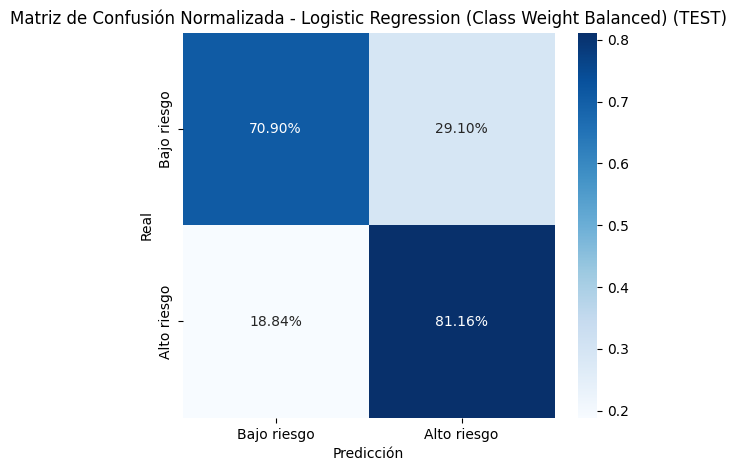

In [24]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)

modelo_lr.fit(X_train, y_train)

lr_metrics = evaluar_overfitting(
    modelo_lr,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression (Class Weight Balanced)"
)

results.append({"Modelo": "Logistic Regression", **lr_metrics})

### ***SMOTE***


===== Logistic Regression + SMOTE ====
---- TRAIN ----
AUC: 0.8889
Recall: 0.7897
Precision: 0.6984
F1: 0.7413

---- TEST ----
AUC: 0.8286
Recall: 0.6739
Precision: 0.3444
F1: 0.4559

---- GAP (Train-Test) ----
AUC gap: 0.0603
Recall gap: 0.1158


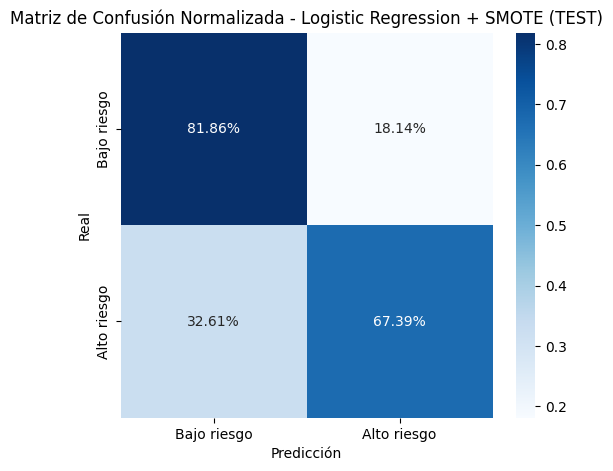

In [25]:
from sklearn.linear_model import LogisticRegression

modelo_lr_smote = LogisticRegression(
    max_iter=2000,
    random_state=42
)

modelo_lr_smote.fit(X_train_sm, y_train_sm)

lr_smote_metrics = evaluar_overfitting(
    modelo_lr_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression + SMOTE"
)

results.append({"Modelo": "Logistic Regression + SMOTE", **lr_smote_metrics})

### ***UNDERSAMPLING***


===== Logistic Regression + Undersampling ====
---- TRAIN ----
AUC: 0.8726
Recall: 0.7631
Precision: 0.6817
F1: 0.7201

---- TEST ----
AUC: 0.8444
Recall: 0.7246
Precision: 0.3636
F1: 0.4843

---- GAP (Train-Test) ----
AUC gap: 0.0282
Recall gap: 0.0385


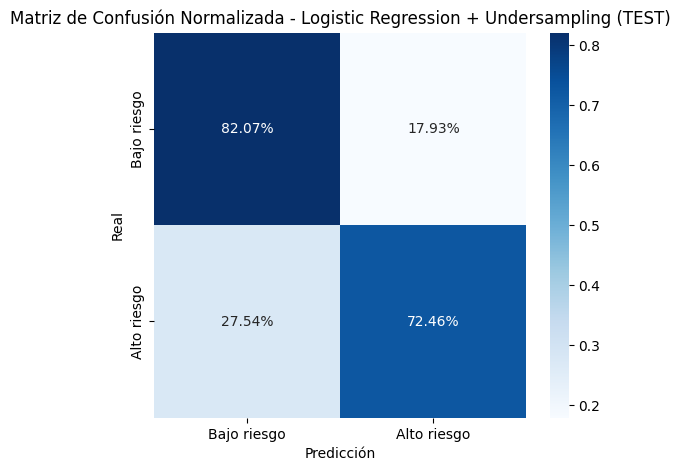

In [26]:
from sklearn.linear_model import LogisticRegression

modelo_lr_under = LogisticRegression(
    max_iter=2000,
    random_state=42
)

modelo_lr_under.fit(X_train_under, y_train_under)

lr_under_metrics = evaluar_overfitting(
    modelo_lr_under,
    X_train_under, y_train_under,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression + Undersampling"
)

results.append({"Modelo": "Logistic Regression + Undersampling", **lr_under_metrics})

## **DECISION TREE**

### ***BALANCEO PROPIO***


===== Decision Tree (Class Weight Balanced) ====
---- TRAIN ----
AUC: 0.8670
Recall: 0.9295
Precision: 0.2772
F1: 0.4271

---- TEST ----
AUC: 0.7824
Recall: 0.8478
Precision: 0.2583
F1: 0.3959

---- GAP (Train-Test) ----
AUC gap: 0.0847
Recall gap: 0.0816


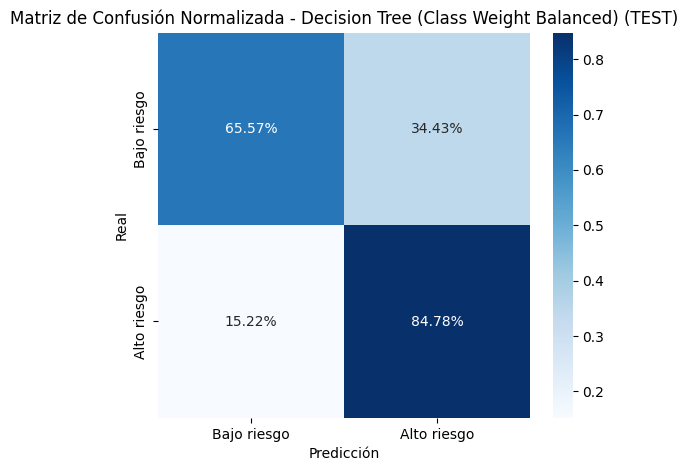

In [27]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

modelo_dt.fit(X_train, y_train)

dt_metrics = evaluar_overfitting(
    modelo_dt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Decision Tree (Class Weight Balanced)"
)

results.append({"Modelo": "Decision Tree Classifier", **dt_metrics})

### ***SMOTE***


===== Decision Tree + SMOTE ====
---- TRAIN ----
AUC: 0.9279
Recall: 0.8538
Precision: 0.7325
F1: 0.7885

---- TEST ----
AUC: 0.8009
Recall: 0.5580
Precision: 0.3548
F1: 0.4338

---- GAP (Train-Test) ----
AUC gap: 0.1270
Recall gap: 0.2959


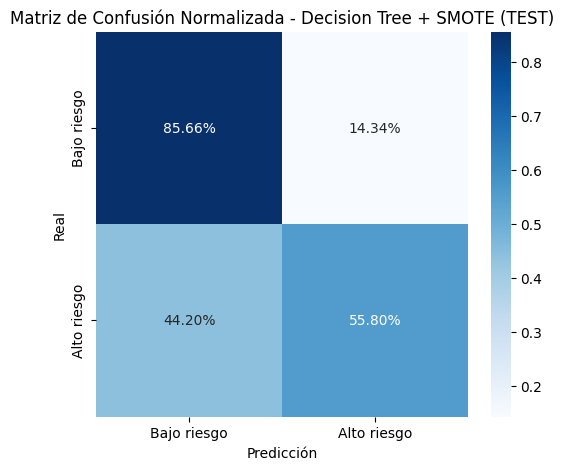

In [28]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt_smote = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

modelo_dt_smote.fit(X_train_sm, y_train_sm)

dt_smote_metrics = evaluar_overfitting(
    modelo_dt_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="Decision Tree + SMOTE"
)

results.append({"Modelo": "Decision Tree + SMOTE", **dt_smote_metrics})

### ***UNDERSAMPLING***


===== Decision Tree + Undersampling ====
---- TRAIN ----
AUC: 0.8772
Recall: 0.7920
Precision: 0.6657
F1: 0.7234

---- TEST ----
AUC: 0.7749
Recall: 0.6449
Precision: 0.3007
F1: 0.4101

---- GAP (Train-Test) ----
AUC gap: 0.1023
Recall gap: 0.1471


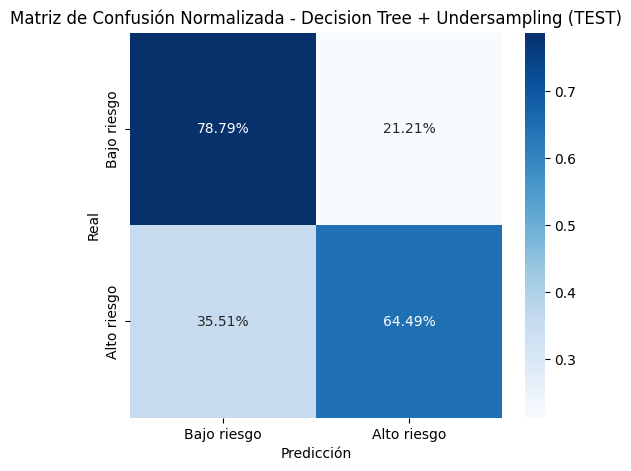

In [29]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt_under = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

modelo_dt_under.fit(X_train_under, y_train_under)

dt_under_metrics = evaluar_overfitting(
    modelo_dt_under,
    X_train_under, y_train_under,
    X_test, y_test,
    threshold=0.4,
    nombre="Decision Tree + Undersampling"
)

results.append({"Modelo": "Decision Tree + Undersampling", **dt_under_metrics})

## **SVM**

### ***BALANCEO PROPIO***


===== SVM Linear Kernel (Class Weight Balanced) ====
---- TRAIN ----
AUC: 0.8725
Recall: 0.3020
Precision: 0.5030
F1: 0.3774

---- TEST ----
AUC: 0.8460
Recall: 0.2826
Precision: 0.4483
F1: 0.3467

---- GAP (Train-Test) ----
AUC gap: 0.0265
Recall gap: 0.0194


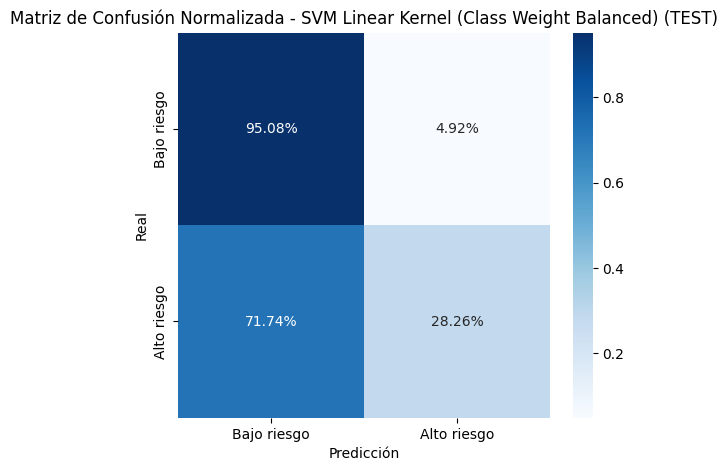

In [30]:
from sklearn.svm import SVC

modelo_svm = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
    class_weight='balanced'
)

modelo_svm.fit(X_train, y_train)

svm_metrics = evaluar_overfitting(
    modelo_svm,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="SVM Linear Kernel (Class Weight Balanced)"
)

results.append({"Modelo": "SVM Linear Kernel", **svm_metrics})

### ***SMOTE***


===== SVM Linear Kernel + SMOTE ====
---- TRAIN ----
AUC: 0.8885
Recall: 0.7785
Precision: 0.7034
F1: 0.7390

---- TEST ----
AUC: 0.8224
Recall: 0.6522
Precision: 0.3475
F1: 0.4534

---- GAP (Train-Test) ----
AUC gap: 0.0661
Recall gap: 0.1263


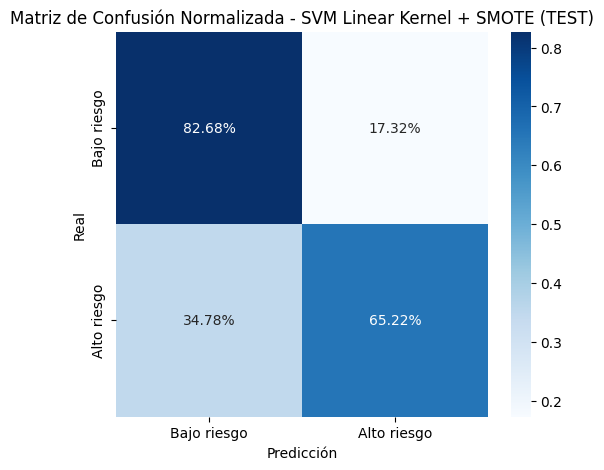

In [31]:
from sklearn.svm import SVC

modelo_svm_smote = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
)

modelo_svm_smote.fit(X_train_sm, y_train_sm)

svm_smote_metrics = evaluar_overfitting(
    modelo_svm_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="SVM Linear Kernel + SMOTE"
)

results.append({"Modelo": "SVM Linear Kernel + SMOTE", **svm_smote_metrics})

### ***UNDERSAMPLING***


===== SVM Linear Kernel + Undersampling ====
---- TRAIN ----
AUC: 0.8712
Recall: 0.7559
Precision: 0.6830
F1: 0.7176

---- TEST ----
AUC: 0.8375
Recall: 0.6957
Precision: 0.3582
F1: 0.4729

---- GAP (Train-Test) ----
AUC gap: 0.0337
Recall gap: 0.0602


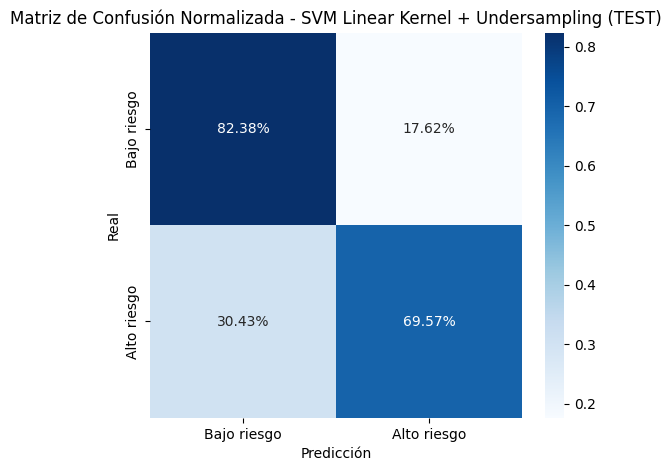

In [32]:
from sklearn.svm import SVC

modelo_svm_under = SVC(
    kernel='linear',
    probability=True,
    random_state=42
)

modelo_svm_under.fit(X_train_under, y_train_under)

svm_under_metrics = evaluar_overfitting(
    modelo_svm_under,
    X_train_under, y_train_under,
    X_test, y_test,
    threshold=0.4,
    nombre="SVM Linear Kernel + Undersampling"
)

results.append({"Modelo": "SVM Linear Kernel + Undersampling", **svm_under_metrics})

In [33]:
import pandas as pd

df_results = pd.DataFrame(results)

print("pruebas con balanceo:")
df_results

pruebas con balanceo:


,Modelo,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Random Forest (Class Weight Balanced),0.901174,0.963834,0.281415,0.435635,0.855867,0.891304,0.268559,0.412752,0.045307,0.072529
1,Random Forest + SMOTE,0.949685,0.856923,0.794202,0.824371,0.846319,0.608696,0.428571,0.502994,0.103366,0.248227
2,Random Forest (Undersampling),0.911656,0.779385,0.734242,0.756140,0.843394,0.710145,0.369811,0.486352,0.068262,0.069240
3,XGBoost,0.951171,0.933846,0.681767,0.788141,0.846660,0.760870,0.335463,0.465632,0.104510,0.172977
4,Balanced Random Forest (Class Weight Balanced),0.999111,1.000000,0.410237,0.581799,0.849007,0.847826,0.309524,0.453488,0.150105,0.152174
5,Logistic Regression,0.873366,0.886076,0.299145,0.447284,0.851308,0.811594,0.282828,0.419476,0.022058,0.074482
6,Logistic Regression + SMOTE,0.888936,0.789744,0.698413,0.741276,0.828641,0.673913,0.344444,0.455882,0.060295,0.115831
7,Logistic Regression + Undersampling,0.872602,0.763110,0.681745,0.720137,0.844381,0.724638,0.363636,0.484262,0.028221,0.038473
8,Decision Tree Classifier,0.867028,0.929476,0.277238,0.427088,0.782367,0.847826,0.258278,0.395939,0.084660,0.081650
9,Decision Tree + SMOTE,0.927922,0.853846,0.732512,0.788539,0.800877,0.557971,0.354839,0.433803,0.127045,0.295875


EL mejor modelo es Logistic Regression	con la clase weight balanced. Muestra el mejor AUC para test, un con valor de recall alto. Si bien el recall no es el más alto, la diferencia entre los los AUC de train - test y los de recall es mas baja, lo que muestra que generaliza bastante bien.

## Validación Cruzada (Logistic Regression - Class Weight Balanced)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

modelo_lr_cw_cv = LogisticRegression(
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)

# Realizar validación cruzada de 5 folds en los datos de entrenamiento originales
scores_lr_cw = cross_val_score(
    modelo_lr_cw_cv,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)

print(f"Scores de Validación Cruzada (ROC AUC) para Logistic Regression (Class Weight Balanced): {scores_lr_cw}")
print(f"ROC AUC promedio: {scores_lr_cw.mean():.4f}")
print(f"Desviación estándar del ROC AUC: {scores_lr_cw.std():.4f}")

Scores de Validación Cruzada (ROC AUC) para Logistic Regression (Class Weight Balanced): [0.85618671 0.85294525 0.85649111 0.86946177 0.8740676 ]
ROC AUC promedio: 0.8618
Desviación estándar del ROC AUC: 0.0083


In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   1114 non-null   float64
 1   genero                                 1114 non-null   int64  
 2   colesterol_total                       1114 non-null   float64
 3   hdl                                    1114 non-null   float64
 4   ldl                                    1114 non-null   float64
 5   trigliceridos                          1114 non-null   float64
 6   proteina_c                             1114 non-null   float64
 7   bmi                                    1114 non-null   float64
 8   fumo_100_cigarrillos                   1114 non-null   int64  
 9   horas_suenio                           1114 non-null   float64
 10  hemoglobina                            1114 non-null   float64
 11  crea